 ### Aqui realizaremos un analisis exploratorio de los datos y sacaremos algunas conclusiones

##### Importamos los modulos necesarios para el analisis:


In [3]:
from sklearn.linear_model import LogisticRegression # para probar

import pandas as pd # para ligeras modificaciones y limpieza de datos
import numpy as np # para operaciones matematicas
import matplotlib.pyplot as plt # para graficar
import seaborn as sns # para usar la funcion pairplot

- Cargamos la fuente de datos

In [4]:
df = pd.read_csv(r'Call_Center_1999_DataSet.csv', delimiter=';')
df.head(4)


C:\Users\Martin\AppData\Local\Temp\ipykernel_14744\861341683.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'Call_Center_1999_DataSet.csv', delimiter=';')


,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0


- Segun la informacion que nos brindaron:

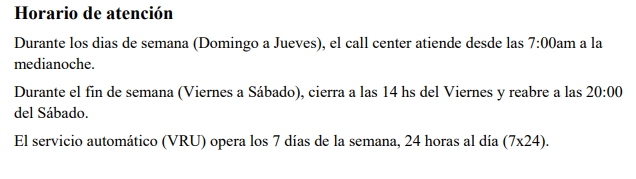

In [5]:
total_registros =  len(df)
print(f'Se realizan en promedio {round(total_registros/365,2)} llamadas por día')

Se realizan en promedio 1217.67 llamadas por día


- Revisamos el tipo de dato de cada campo y si hay datos nulos

In [6]:
df.info() # revisamos los tipos de datos de cada campo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444448 entries, 0 to 444447
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   vru.line     444448 non-null  object
 1   call_id      444448 non-null  int64 
 2   customer_id  444448 non-null  object
 3   priority     444448 non-null  int64 
 4   type         444448 non-null  object
 5   date         444448 non-null  object
 6   vru_entry    444448 non-null  object
 7   vru_exit     444448 non-null  object
 8   vru_time     444448 non-null  int64 
 9   q_start      444448 non-null  object
 10  q_exit       444448 non-null  object
 11  q_time       444448 non-null  int64 
 12  outcome      444448 non-null  object
 13  ser_start    444448 non-null  object
 14  ser_exit     444448 non-null  object
 15  ser_time     444448 non-null  int64 
 16  server       444448 non-null  object
 17  startdate    444448 non-null  int64 
dtypes: int64(6), object(12)
memory usage: 61.0+ 

No hay datos nulos

- A simple vista, podemos ver que los valores de **call_id** y de **vru.line** se repiten. A partir de la concatenacion de estas columnas vamos a crear un **id**

In [7]:
df[df['call_id']== 33117].head(4)

,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
1,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
14853,AA0202,33117,0.0,0,PS,1999-01-14,16:50:18,16:50:31,13,0:00:00,0:00:00,0,AGENT,16:50:30,16:52:46,136,ZOHARI,0
31152,AA0204,33117,0.0,0,NE,1999-01-31,13:31:27,13:31:39,12,0:00:00,0:00:00,0,AGENT,13:31:38,13:35:25,227,ELI,0
47118,AA0209,33117,0.0,0,NW,1999-02-12,10:44:35,10:44:44,9,10:44:44,10:47:57,193,HANG,0:00:00,0:00:00,0,NO_SERVER,31


    Los call_id se repiten pero notemos tambien que estan asignados a distintos VRUs

-----
Nuestra columna **id** la crearemos de la siguiente forma:

In [8]:
# arreglamos el tipo de dato de cada columna
df['call_id'] = (df['call_id'].astype(int)).astype(str)
df['vru.line'] = df['vru.line'].astype(str)

In [9]:
df.columns

Index(['vru.line', 'call_id', 'customer_id', 'priority', 'type', 'date',
       'vru_entry', 'vru_exit', 'vru_time', 'q_start', 'q_exit', 'q_time',
       'outcome', 'ser_start', 'ser_exit', 'ser_time', 'server', 'startdate'],
      dtype='object')

In [10]:
# concatenamos las columnas
df['id'] = df['vru.line'] + '-' + df['call_id']

## ordenamos todo el dataframe:
df = df.reindex(columns=['id','vru.line', 'call_id', 'customer_id', 'priority', 'type', 'date',
       'vru_entry', 'vru_exit', 'vru_time', 'q_start', 'q_exit', 'q_time',
       'outcome', 'ser_start', 'ser_exit', 'ser_time', 'server', 'startdate'])
df.head(4)


,id,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101-33116,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101-33117,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101-33118,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101-33119,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0


Verificamos que id_llamada solo tenga valores unicos:

In [11]:
len(df['id'].unique())
## Esta OK

444448

-----

- Analizamos el campo **customer_id**:

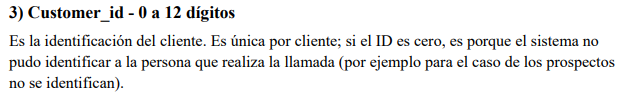

In [12]:
df['customer_id'].value_counts()
# aca vemos que 0.0 y 0 no los toma como iguales, habra que transformar todo a un mismo tipo de datos

0.0           178572
0              55980
58859752.0      1661
58704610.0      1375
7191646.0       1264
               ...  
22862023           1
3100351.0          1
53528683.0         1
15571748.0         1
53525267.0         1
Name: customer_id, Length: 19048, dtype: int64

In [13]:
## A continuacion vamos a solucionar el problema que estamos teniendo para homogeinezar los campos que poseen '0'(string) con los que poseen 0.0 (float)
df['customer_id'][df['customer_id'] == '0'] = df['customer_id'][df['customer_id'] == '0'].astype(float) # transformo '0' a 0.0
# verificamos que esto se haya corregido:
df['customer_id'].value_counts()
## Quedo OK

C:\Users\Martin\AppData\Local\Temp\ipykernel_14744\3326034874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['customer_id'][df['customer_id'] == '0'] = df['customer_id'][df['customer_id'] == '0'].astype(float) # transformo '0' a 0.0


0.0           234552
58859752.0      1661
58704610.0      1375
7191646.0       1264
52867744.0      1207
               ...  
36482305           1
29571775           1
55893531           1
64876170           1
53525267.0         1
Name: customer_id, Length: 19047, dtype: int64

De aqui podemos concluir que hay registros de *19047-1 = 19046* clientes identificados en este total de registros de llamadas, el *customer_id = 0.0* no se cuenta

**- Si 'customer_id' es 0, es porque el sistema no pudo identificar a la persona que realiza la llamada, es decir, podrian ser prospectos (potenciales clientes)**

In [14]:
prob_customers = pd.DataFrame() # defino mi variable como un DataFrame   
prob_customers['frec_abs'] = df['customer_id'].value_counts() # creo un df que tendra los id de cada cliente junto con su frec absoluta
prob_customers = prob_customers.reset_index() # como los id me los toma como indices, entonces resetearemos los index para que me lo tome como una columna aparte
prob_customers = prob_customers.rename(columns={'index':'customer_id'}) #renombramos la columna que queremos
prob_customers ['frec_rel'] = prob_customers['frec_abs']/total_registros
prob_customers ['frec_rel (%)'] = prob_customers['frec_abs']*100/total_registros
prob_customers.sort_values(by='frec_rel (%)', ascending=False, inplace=True)  # lo dejamos ordenado
prob_customers ## Ualá, tenemos un Dataframe que nos muestra las frecuencias absolutas de cada id de cliente


,customer_id,frec_abs,frec_rel,frec_rel (%)
0,0.0,234552,0.527738,52.773778
1,58859752.0,1661,0.003737,0.373722
2,58704610.0,1375,0.003094,0.309373
3,7191646.0,1264,0.002844,0.284398
4,52867744.0,1207,0.002716,0.271573
...,...,...,...,...
15715,62449814.0,1,0.000002,0.000225
15714,1429448.0,1,0.000002,0.000225
15713,23883952.0,1,0.000002,0.000225
15712,54912779,1,0.000002,0.000225


In [15]:
prob_no_id = round(prob_customers['frec_rel'].loc[0] *100,2) # probabilidad de clientes no identificados
prob_id = 100 - prob_no_id # probabilidad de clientes identificados

print(f'Resumiendo, el {prob_no_id}% del total de llamadas son clientes no identificados o potenciales clientes.')
print(f'Mientras que el restante {prob_id}% del total de llamadas corresponde a clientes que si se logró identificar')


Resumiendo, el 52.77% del total de llamadas son clientes no identificados o potenciales clientes.
Mientras que el restante 47.23% del total de llamadas corresponde a clientes que si se logró identificar


- Analizamos el campo **priority**:

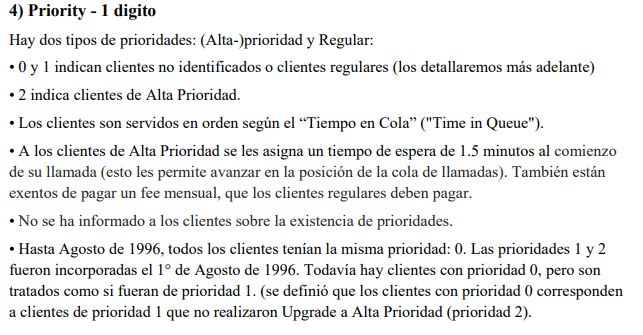
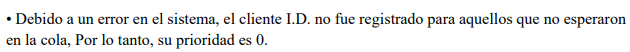

In [16]:
df['priority'] = df['priority'].astype(float)
df['priority']

0         2.0
1         0.0
2         2.0
3         0.0
4         0.0
         ... 
444443    0.0
444444    0.0
444445    0.0
444446    0.0
444447    0.0
Name: priority, Length: 444448, dtype: float64

In [36]:
## existe una unica prioridad para cada customer_id??
df[(df['priority'] == 0) & (df['customer_id'] != 0)]
 
## vemos que no, entonces vamos a ver si un mismo customer_id tiene mas de una prioridad
df[df['customer_id']==58704610.0].groupby('priority').count()
## entonces vemos que si, un mismo customer_id puede tener mas de una prioridad

,id,vru.line,call_id,customer_id,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
priority,,,,,,,,,,,,,,,,,,
2.0,1375,1375,1375,1375,1375,1375,1375,1375,1375,1375,1375,1375,1375,1375,1375,1375,1375,1375


In [18]:
prob_priority = pd.DataFrame()
prob_priority['priority'] = [0,1,2]
prob_priority['frec_abs'] = df['priority'].value_counts().sort_index()
prob_priority['frec_rel'] = prob_priority['frec_abs']/total_registros
prob_priority['frec_rel (%)'] = prob_priority['frec_rel']*100
prob_priority.sort_values(by='frec_abs', ascending=False, inplace=True) # lo dejamos ordenado

In [37]:
prob_priority_0 = round(prob_priority['frec_rel (%)'].loc[0],2)
prob_priority_1 = round(prob_priority['frec_rel (%)'].loc[1],2)
prob_priority_2 = round(prob_priority['frec_rel (%)'].loc[2],2)

print(f'En resumen, el {prob_priority_0}% del total de registros corresponde a clientes que no fueron identificados o bien no esperaron la cola')
print(f'Luego, un {prob_priority_1}% del total de registros corresponde a clientes regulares')
print(f'Finalmente, un {prob_priority_2}% del total de registros corresponde a clientes de alta prioridad')

En resumen, el 52.91% del total de registros corresponde a clientes que no fueron identificados, que no esperaron la cola
Luego, un 16.16% del total de registros corresponde a clientes regulares
Finalmente, un 30.93% del total de registros corresponde a clientes de alta prioridad


- Analizamos el campo **type**:

# Vamos de nuevo a nuestro dataset

In [ ]:
df.head(4)

,id_llamada,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,q_exit,q_time,outcome,ser_start,ser_exit,ser_time,server,startdate
0,AA0101-33116,AA0101,33116,9664491.0,2,PS,1999-01-01,0:00:31,0:00:36,5,0:00:36,0:03:09,153,HANG,0:00:00,0:00:00,0,NO_SERVER,0
1,AA0101-33117,AA0101,33117,0.0,0,PS,1999-01-01,0:34:12,0:34:23,11,0:00:00,0:00:00,0,HANG,0:00:00,0:00:00,0,NO_SERVER,0
2,AA0101-33118,AA0101,33118,27997683.0,2,PS,1999-01-01,6:55:20,6:55:26,6,6:55:26,6:55:43,17,AGENT,6:55:43,6:56:37,54,MICHAL,0
3,AA0101-33119,AA0101,33119,0.0,0,PS,1999-01-01,7:41:16,7:41:26,10,0:00:00,0:00:00,0,AGENT,7:41:25,7:44:53,208,BASCH,0


Seguiremos con la columna **'type'**

In [ ]:
df['type'].value_counts()

PS     302522
NW      67728
NE      39342
IN      20732
TT      12289
PE       1824
 TT         6
AA          5
Name: type, dtype: int64

Notemos que tenemos un problema, tenemos un campo llamado 'TT' y otro llamado ' TT', deberemos homogeneizar estos valores para no transmitir datos erroneos.

In [ ]:
df['type'].replace(' TT', 'TT', inplace=True)
df['type'].value_counts()

PS    302522
NW     67728
NE     39342
IN     20732
TT     12295
PE      1824
AA         5
Name: type, dtype: int64

Con el codigo anterior ya hemos homogeneizado los valores **'TT'** y **' TT'**

Ahora ya podemos hacer una tabla con los valores de frecuencia absoluta y frecuencia relativa de cada valor

In [ ]:
unique_types = df['type'].unique()
lista = []
ind = 123
type(23)

# for type_aux in unique_types:

#     for i in df['type']:
#         if (type_aux == i):              
#               lista[ind] += 1
#         else:
#              continue
#     ind =+ 1

# lista


TypeError: 'str' object is not callable